# Uploading Data

In [1]:
# libraries
import numpy as np
import pandas as pd
import random
import seaborn as sns
sns.set(style="ticks", color_codes=True)
from sklearn import neighbors
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from scipy.stats import zscore
import matplotlib.pyplot as plt

In [2]:
#Columns/Features
D = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol']
L = 'quality'
C = 'color'
DL = D + [L]
DC = D + [C]
DLC = DL + [C]

#Loading Data set
wine_r = pd.read_csv("winequality-red.csv", sep=';')
#Loading Data set
wine_w = pd.read_csv("winequality-white.csv", sep=';')
wine_w= wine_w.copy()
wine_w[C]= np.zeros(wine_w.shape[0])
wine_r[C]= np.ones(wine_r.shape[0])
wine = pd.concat([wine_w,wine_r])

In [50]:
print(wine.shape)
wine[D].describe()
wine[D].head()

(6497, 13)


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9


In [23]:
#z-score normalization

zscore_wine = wine.apply(zscore)
zscore_wine

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,color
0,-0.166089,-0.423183,0.284686,3.206929,-0.314975,0.815565,0.959976,2.102214,-1.359049,-0.546178,-1.418558,0.207999,-0.571367
1,-0.706073,-0.240949,0.147046,-0.807837,-0.200790,-0.931107,0.287618,-0.232332,0.506915,-0.277351,-0.831615,0.207999,-0.571367
2,0.682458,-0.362438,0.559966,0.306208,-0.172244,-0.029599,-0.331660,0.134525,0.258120,-0.613385,-0.328521,0.207999,-0.571367
3,-0.011808,-0.666161,0.009406,0.642523,0.056126,0.928254,1.243074,0.301278,-0.177272,-0.882212,-0.496219,0.207999,-0.571367
4,-0.011808,-0.666161,0.009406,0.642523,0.056126,0.928254,1.243074,0.301278,-0.177272,-0.882212,-0.496219,0.207999,-0.571367
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1594,-0.783214,1.581387,-1.642273,-0.723758,0.969605,0.083090,-1.269422,0.067824,1.439897,0.327510,0.006875,-0.937230,1.750190
1595,-1.014636,1.277665,-1.504633,-0.681719,0.170311,0.477500,-1.145567,0.141195,1.875288,1.537233,0.593818,0.207999,1.750190
1596,-0.706073,1.034686,-1.298173,-0.660699,0.569958,-0.085943,-1.340197,0.347969,1.253300,1.470026,0.426120,0.207999,1.750190
1597,-1.014636,1.854738,-1.366993,-0.723758,0.541412,0.083090,-1.269422,0.257923,2.186282,1.201199,-0.244672,-0.937230,1.750190


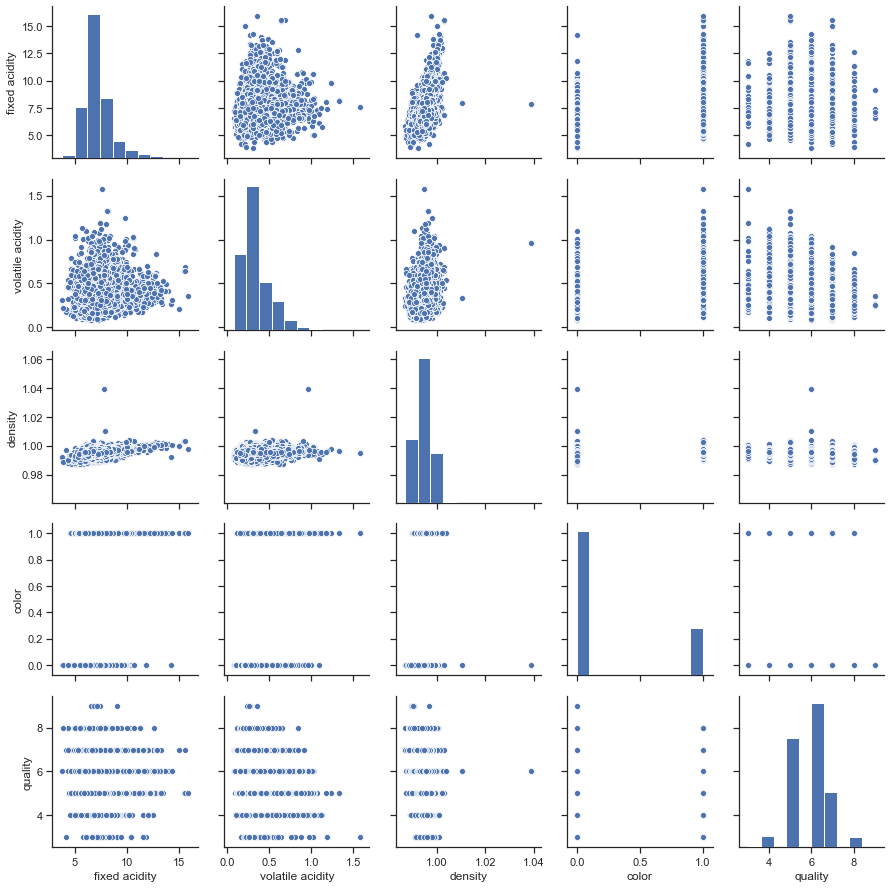

In [6]:
#unnormalized pair plot
custom_features = ['fixed acidity', 'volatile acidity', 'density', 'color', 'quality']
unnormalized_pair_plot = sns.pairplot(wine[custom_features])

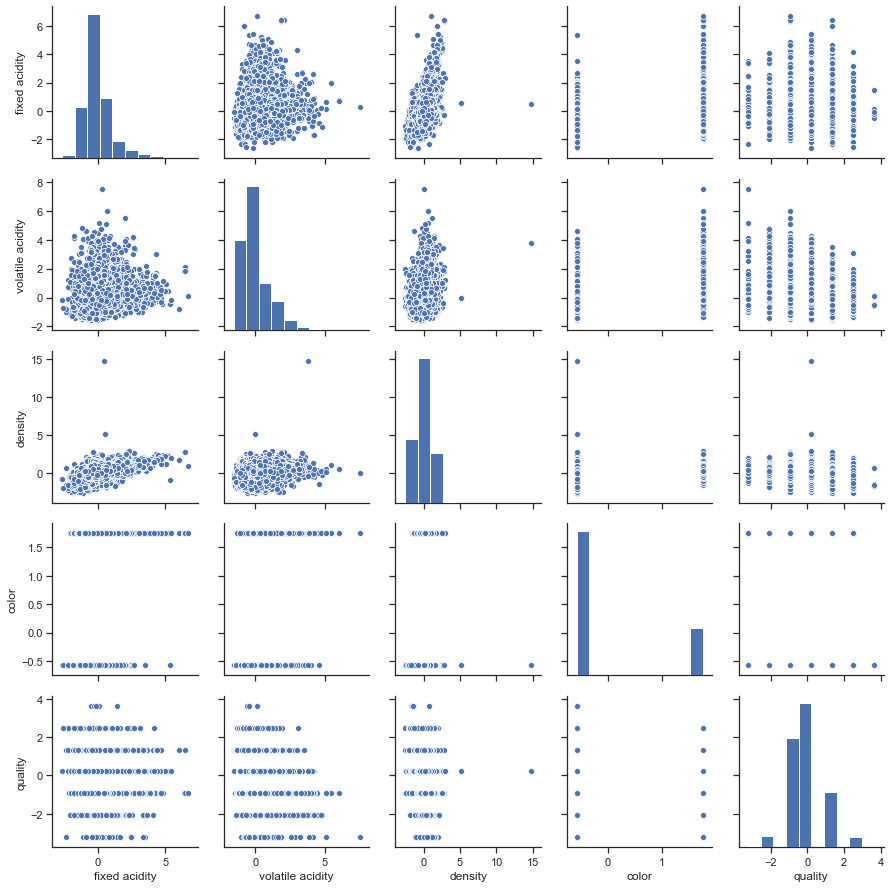

In [7]:
# z-score normalized pair plot

normalized_pair_plot = sns.pairplot(zscore_wine[custom_features])

In [8]:
# classify color of wine with all features
X = zscore_wine[D].values
y = np.ravel(wine[[C]])

ran = 42
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.8, random_state = ran) 

In [9]:
n_neighborslist = list(range(1,50))
col_names=['uniform', 'manhattan', 'euclidean']
accarray = np.zeros((len(n_neighborslist),3))

#add multiple plots to same chart, one for each weighting approach
acc=pd.DataFrame(accarray, columns=col_names)

for k in n_neighborslist:
    neigh_uniform = neighbors.KNeighborsClassifier(n_neighbors=k, weights='uniform')
    neigh_manhattan = neighbors.KNeighborsClassifier(n_neighbors=k, weights='distance', metric='manhattan')
    neigh_euclidean = neighbors.KNeighborsClassifier(n_neighbors=k, weights='distance', metric='euclidean')
    
    neigh_uniform.fit(X_train, y_train)
    neigh_manhattan.fit(X_train, y_train)
    neigh_euclidean.fit(X_train, y_train)
    
    y_pred_uniform = neigh_uniform.predict(X_test)
    y_pred_manhattan = neigh_manhattan.predict(X_test)
    y_pred_euclidean = neigh_euclidean.predict(X_test)
    
    accscore_uniform = accuracy_score(y_test, y_pred_uniform)
    accscore_manhattan = accuracy_score(y_test, y_pred_manhattan)
    accscore_euclidean = accuracy_score(y_test, y_pred_euclidean)
    
    
    acc.at[k, col_names[0]] = accscore_uniform
    acc.at[k, col_names[1]] = accscore_manhattan
    acc.at[k, col_names[2]] = accscore_euclidean

acc.describe()
acc.head()


,uniform,manhattan,euclidean
0,0.000000,0.000000,0.000000
1,0.988649,0.989227,0.988649
2,0.989419,0.989227,0.988649
3,0.989611,0.992112,0.990189
4,0.987110,0.991728,0.990766


# Accuracy and Neightborhood Size on Normalized data

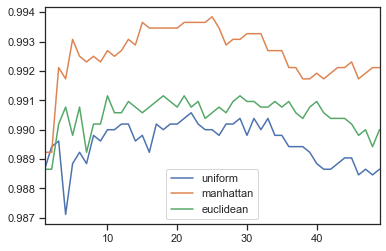

In [10]:
acc[1:].plot.line()

# PCA FITTING COLOR

In [34]:
#Fitting PCA Color models
pca = PCA(n_components=5)

X = zscore_wine[D].values
y_color = np.ravel(wine[[C]])

X_train_color, X_test_color, y_train_color, y_test_color = train_test_split(X, y_color, test_size=0.8, random_state = 42) 

pca.fit(X_train_color)
X_train_color = pca.fit_transform(X_train_color)
X_test_color = pca.fit_transform(X_test_color)

n_neighborslist = list(range(1,50))
col_names=['uniform_pca_color', 'manhattan_pca_color', 'euclidean_pca_color']
accarray = np.zeros((len(n_neighborslist),3))

#add multiple plots to same chart, one for each weighting approach
acc=pd.DataFrame(accarray, columns=col_names)

for k in n_neighborslist:
    neigh_uniform = neighbors.KNeighborsClassifier(n_neighbors=k, weights='uniform')
    neigh_manhattan = neighbors.KNeighborsClassifier(n_neighbors=k, weights='distance', metric='manhattan')
    neigh_euclidean = neighbors.KNeighborsClassifier(n_neighbors=k, weights='distance', metric='euclidean')
    
    neigh_uniform.fit(X_train_color, y_train_color)
    neigh_manhattan.fit(X_train_color, y_train_color)
    neigh_euclidean.fit(X_train_color, y_train_color)
    
    y_pred_uniform = neigh_uniform.predict(X_test_color)
    y_pred_manhattan = neigh_manhattan.predict(X_test_color)
    y_pred_euclidean = neigh_euclidean.predict(X_test_color)
    
    accscore_uniform = accuracy_score(y_test_color, y_pred_uniform)
    accscore_manhattan = accuracy_score(y_test_color, y_pred_manhattan)
    accscore_euclidean = accuracy_score(y_test_color, y_pred_euclidean)
    
    
    acc.at[k, col_names[0]] = accscore_uniform
    acc.at[k, col_names[1]] = accscore_manhattan
    acc.at[k, col_names[2]] = accscore_euclidean

acc.describe()
acc.head()

X




array([[-0.16608919, -0.42318303,  0.28468605, ..., -1.35904886,
        -0.54617826, -1.41855821],
       [-0.70607349, -0.24094936,  0.14704613, ...,  0.50691489,
        -0.27735097, -0.83161516],
       [ 0.68245757, -0.36243847,  0.55996589, ...,  0.25811972,
        -0.61338508, -0.32852111],
       ...,
       [-0.70607349,  1.03468634, -1.29817304, ...,  1.25330039,
         1.47002637,  0.42611996],
       [-1.01463595,  1.85473786, -1.366993  , ...,  2.18628226,
         1.20119908, -0.2446721 ],
       [-0.93749534, -0.1802048 ,  1.04170561, ...,  1.06670401,
         0.86516498,  0.42611996]])

# Accuracy and Neightborhood Size on PCA Color data

In [ ]:
acc[1:].plot.line()

# PCA FITTING QUALITY

In [41]:
#Fitting PCA Quality to the models
pca = PCA(n_components=5)

X = zscore_wine[D].values
y_quality = np.ravel(wine[[L]])

X_train_quality, X_test_quality, y_train_quality, y_test_quality = train_test_split(X, y_quality, test_size=0.8, random_state = 42) 

pca.fit(X_train_quality)
X_train_quality = pca.fit_transform(X_train_quality)
X_test_quality = pca.fit_transform(X_test_quality)


n_neighborslist = list(range(1,50))
col_names=['uniform_pca_quality', 'manhattan_pca_quality', 'euclidean_pca_quality']
accarray = np.zeros((len(n_neighborslist),3))

#add multiple plots to same chart, one for each weighting approach
acc=pd.DataFrame(accarray, columns=col_names)

for k in n_neighborslist:
    neigh_uniform = neighbors.KNeighborsClassifier(n_neighbors=k, weights='uniform')
    neigh_manhattan = neighbors.KNeighborsClassifier(n_neighbors=k, weights='distance', metric='manhattan')
    neigh_euclidean = neighbors.KNeighborsClassifier(n_neighbors=k, weights='distance', metric='euclidean')
    
    neigh_uniform.fit(X_train_quality, y_train_quality)
    neigh_manhattan.fit(X_train_quality, y_train_quality)
    neigh_euclidean.fit(X_train_quality, y_train_quality)
    
    y_pred_uniform = neigh_uniform.predict(X_test_quality)
    y_pred_manhattan = neigh_manhattan.predict(X_test_quality)
    y_pred_euclidean = neigh_euclidean.predict(X_test_quality)
    
    accscore_uniform = accuracy_score(y_test_quality, y_pred_uniform)
    accscore_manhattan = accuracy_score(y_test_quality, y_pred_manhattan)
    accscore_euclidean = accuracy_score(y_test_quality, y_pred_euclidean)
    
    
    acc.at[k, col_names[0]] = accscore_uniform
    acc.at[k, col_names[1]] = accscore_manhattan
    acc.at[k, col_names[2]] = accscore_euclidean

acc.describe()
acc.head()


,uniform_pca_quality,manhattan_pca_quality,euclidean_pca_quality
0,0.000000,0.000000,0.000000
1,0.375337,0.376299,0.375337
2,0.373990,0.376299,0.375337
3,0.379569,0.395922,0.395729
4,0.399769,0.409965,0.403617


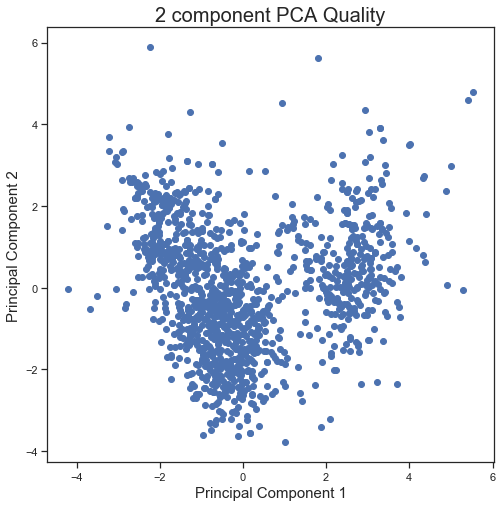

In [43]:
columns = ['PC1', 'PC2', 'PC3', 'PC4','PC5']
 
pcaDf_q = pd.DataFrame(data = X_train_quality, columns=columns)
finalDf_1v2 = pd.concat([pcaDf_q['PC1'], pcaDf_q['PC2']], axis=1)

fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA Quality', fontsize = 20)

ax.scatter(finalDf_1v2['PC1'], finalDf_1v2['PC2'])

# Accuracy and Neightborhood Size on PCA Quality data

In [ ]:
acc[1:].plot.line()

# LDA FITTING QUALITY

In [48]:
#Fitting PCA and LDA to the models
lda = LDA(n_components=5)

X = wine[D].values
y_quality = np.ravel(wine[[L]])

X_train_quality, X_test_quality, y_train_quality, y_test_quality = train_test_split(X, y_quality, test_size=0.8, random_state = 42) 

#lda.fit(X_train_quality, y_train_quality)
X_train_quality = lda.fit_transform(X_train_quality, y_train_quality)
X_test_quality = lda.transform(X_test_quality)


n_neighborslist = list(range(1,50))
col_names=['uniform_lda_quality', 'manhattan_lda_quality', 'euclidean_lda_quality']
accarray = np.zeros((len(n_neighborslist),3))

#add multiple plots to same chart, one for each weighting approach
acc=pd.DataFrame(accarray, columns=col_names)

for k in n_neighborslist:
    neigh_uniform = neighbors.KNeighborsClassifier(n_neighbors=k, weights='uniform')
    neigh_manhattan = neighbors.KNeighborsClassifier(n_neighbors=k, weights='distance', metric='manhattan')
    neigh_euclidean = neighbors.KNeighborsClassifier(n_neighbors=k, weights='distance', metric='euclidean')
    
    neigh_uniform.fit(X_train_quality, y_train_quality)
    neigh_manhattan.fit(X_train_quality, y_train_quality)
    neigh_euclidean.fit(X_train_quality, y_train_quality)
    
    y_pred_uniform = neigh_uniform.predict(X_test_quality)
    y_pred_manhattan = neigh_manhattan.predict(X_test_quality)
    y_pred_euclidean = neigh_euclidean.predict(X_test_quality)
    
    accscore_uniform = accuracy_score(y_test_quality, y_pred_uniform)
    accscore_manhattan = accuracy_score(y_test_quality, y_pred_manhattan)
    accscore_euclidean = accuracy_score(y_test_quality, y_pred_euclidean)
    
    
    acc.at[k, col_names[0]] = accscore_uniform
    acc.at[k, col_names[1]] = accscore_manhattan
    acc.at[k, col_names[2]] = accscore_euclidean

acc.describe()
acc.head()


,uniform_lda_quality,manhattan_lda_quality,euclidean_lda_quality
0,0.000000,0.000000,0.000000
1,0.481339,0.490189,0.481339
2,0.470181,0.490189,0.481339
3,0.467103,0.517891,0.508080
4,0.503078,0.525010,0.518661


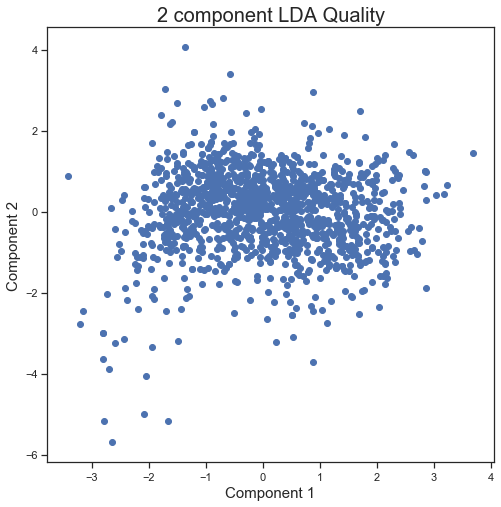

In [52]:
columns = ['PC1', 'PC2', 'PC3', 'PC4','PC5']
 
ldaDf_q = pd.DataFrame(data = X_train_quality, columns=columns)
finalDf_1v2 = pd.concat([ldaDf_q['PC1'], ldaDf_q['PC2']], axis=1)

fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Component 1', fontsize = 15)
ax.set_ylabel('Component 2', fontsize = 15)
ax.set_title('2 component LDA Quality', fontsize = 20)

ax.scatter(finalDf_1v2['PC1'], finalDf_1v2['PC2'])

# Accuracy and Neightborhood Size on LDA Quality data

In [ ]:
acc[1:].plot.line()